In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\yavuzcevik\Desktop\samiwatches.csv")


In [20]:
df.columns

Index(['name', 'MARKA', 'KOLEKSIYON', 'price', 'price_category', 'CINSIYET',
       'MEKANIZMA', 'KASA MATERYALI', 'case_material_category', 'KASA ÇAPI',
       'SU REZISTANSI', 'water_resistance_category', 'brand_country',
       'brand_age', 'collection_price_tier', 'url', 'image', 'page',
       'scraped_at', 'AILE', 'GARANTI SÜRESI', 'GÜÇ REZERVI', 'KADRAN',
       'KAYIŞ', 'PRODUCT_NAME_DETAIL', 'PRODUCT_PRICE_DETAIL', 'REFERANS',
       'brand_founded_year', 'brand_avg_price', 'brand_median_price',
       'brand_price_std', 'brand_product_count', 'price_vs_brand_avg',
       'price_percentile', 'price_zscore', 'is_price_outlier',
       'collection_popularity', 'water_resistance_standardized',
       'price_category_improved', 'case_diameter_numeric',
       'case_size_category', 'brand_prestige_level'],
      dtype='object')

<h3>Göründüğü gibi çok fazla sütun var ve ben şimdilik incelemek istediğim kolonları seçiyorum </h3>

In [21]:
columns =  ["name","MARKA","KOLEKSIYON","price","price_category","CINSIYET","MEKANIZMA","KASA MATERYALI"]
df = df[columns]
df.columns.tolist()

['name',
 'MARKA',
 'KOLEKSIYON',
 'price',
 'price_category',
 'CINSIYET',
 'MEKANIZMA',
 'KASA MATERYALI']

<h3>Sütun isimlerini manuel olarak düzelttim çünkü türkçe ingilizce karışıktı ve az sayıdaydı </h3>

In [22]:
df.columns = ["Name","Brand","Collection","Price","Price_category","Gender","Mechanism","Case_material"]
df.head()


,Name,Brand,Collection,Price,Price_category,Gender,Mechanism,Case_material
0,Luminor Marina,Panerai,Luminor,473800.0,Luxury,Erkek,Otomatik,Paslanmaz Çelik
1,Ultra-Chron Classic,Longines,Diving,183000.0,Mid-Range,Erkek,Otomatik,Paslanmaz Çelik
2,Bvlgari Bvlgari,Bvlgari,Bvlgari Bvlgari,557000.0,Ultra-Luxury,Kadın,Pilli,Altın
3,Specialities Paris 2024 Bronze Gold Edition,Omega,Diğer Koleksiyonlar,611100.0,Ultra-Luxury,Erkek,Elle Kurmalı,Altın
4,Pioneer Centre Seconds Spiced Aqua,H. Moser & Cie.,Pioneer,858000.0,Ultra-Luxury,Erkek,Otomatik,Paslanmak Çelik DLC


In [23]:
df.info() 
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1670 non-null   object 
 1   Brand           1670 non-null   object 
 2   Collection      1670 non-null   object 
 3   Price           1670 non-null   float64
 4   Price_category  1670 non-null   object 
 5   Gender          1670 non-null   object 
 6   Mechanism       1670 non-null   object 
 7   Case_material   1670 non-null   object 
dtypes: float64(1), object(7)
memory usage: 104.5+ KB


Name              0
Brand             0
Collection        0
Price             0
Price_category    0
Gender            0
Mechanism         0
Case_material     0
dtype: int64

<h3>Fiyat kategorilerine ait saat sayılarını gösteren barchart </h3>

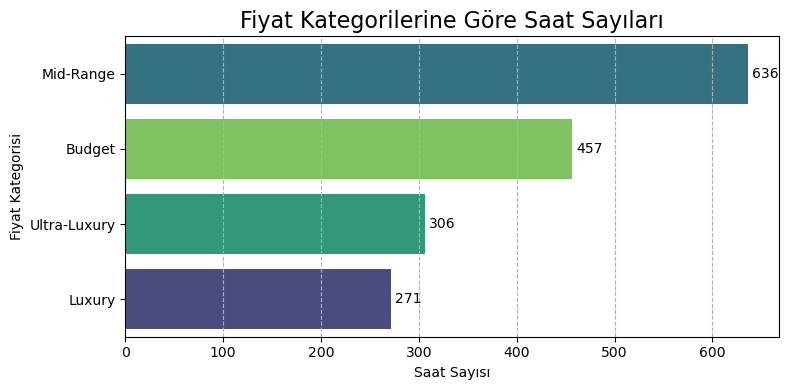

In [32]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(
    y='Price_category',
    data=df,
    order=df['Price_category'].value_counts().index,
    hue='Price_category',     
    palette='viridis',
)

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title('Fiyat Kategorilerine Göre Saat Sayıları', fontsize=16)
plt.xlabel('Saat Sayısı')
plt.ylabel('Fiyat Kategorisi')
plt.grid(axis='x', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()



<h3>En pahalı 5 saatin  hem tablo hemde barchart  olarak gösterimi</h3>

                              Name             Brand      Price Price_category
1289                   Hourstriker     Ulysse Nardin  7321600.0   Ultra-Luxury
859   Dimier Collection Récital 27             Bovet  6307600.0   Ultra-Luxury
804         Streamliner Tourbillon   H. Moser & Cie.  5928000.0   Ultra-Luxury
1010        Streamliner Tourbillon   H. Moser & Cie.  5928000.0   Ultra-Luxury
901                       Laureato  Girard-Perregaux  4700800.0   Ultra-Luxury


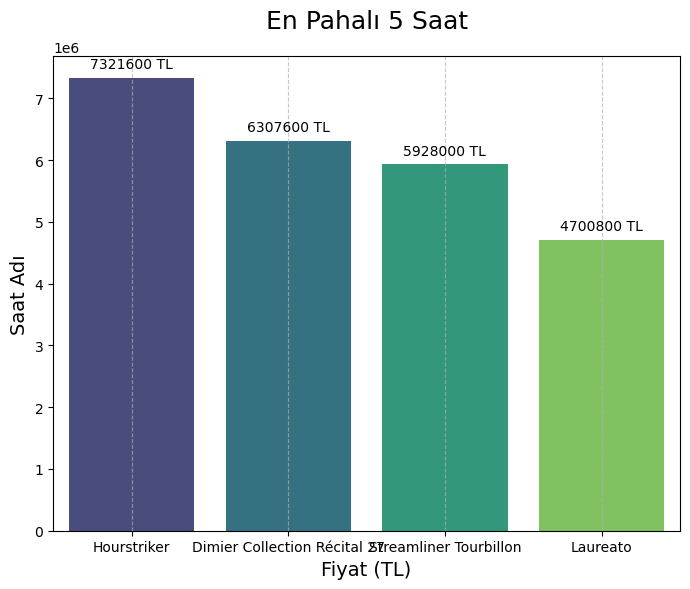

In [25]:
top_5_expensive = df.sort_values(by='Price', ascending=False).head(5)
print(top_5_expensive[['Name', 'Brand', 'Price', 'Price_category']])

plt.figure(figsize=(7, 6))

ax = sns.barplot(
    x='Name',
    y='Price',
    data=top_5_expensive,
    palette='viridis',
    hue='Name', 
    legend=False
)

plt.title('En Pahalı 5 Saat', fontsize=18, pad=20)
plt.xlabel('Fiyat (TL)', fontsize=14)
plt.ylabel('Saat Adı', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Bar sonlarına fiyat etiketlerini ekleme
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.0f TL', # Fiyatı tam sayı ve 'TL' etiketiyle formatla
        padding=5,
        fontsize=10
    )

plt.tight_layout()
plt.show()



<h3>Burada kasıtlı olarak bıraktığım bir hata var ilk denememde kontrol etmediğim için kalmış ama güzel bir detay;    Verisetinde 3 farklı cinsiyet tipi verilmiş ama kontrol etmediğim için  çift cinsiyet olarak yazdığım bir kod göreceksiniz  ve  bu problemi  charttan hemen sonra nasıl düzelttiğimi göstereceğim </h3> 

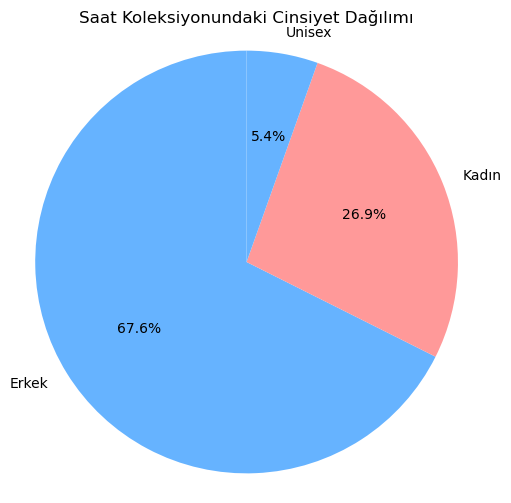

In [43]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize = (6,6))
labels = gender_counts.index
sizes = gender_counts.values
autopct = '%1.1f%%' # Yüzdeleri 1 tane ondalık ile gösteriyor 

plt.pie(sizes, 
        labels=labels, 
        autopct=autopct, 
        startangle=90,
        colors=['#66b3ff', '#ff9999']) 
plt.title('Saat Koleksiyonundaki Cinsiyet Dağılımı')
plt.axis('equal') 
plt.show()

<h3> Sorunu gördükten sonraki kontrol ve düzeltme aşaması </h3>

In [27]:
df['Gender'].unique()

array(['Erkek', 'Kadın', 'Erkek, Kadın'], dtype=object)

In [28]:
df['Gender'] = df['Gender'].replace('Erkek, Kadın', 'Unisex')
df['Gender'].unique()

array(['Erkek', 'Kadın', 'Unisex'], dtype=object)

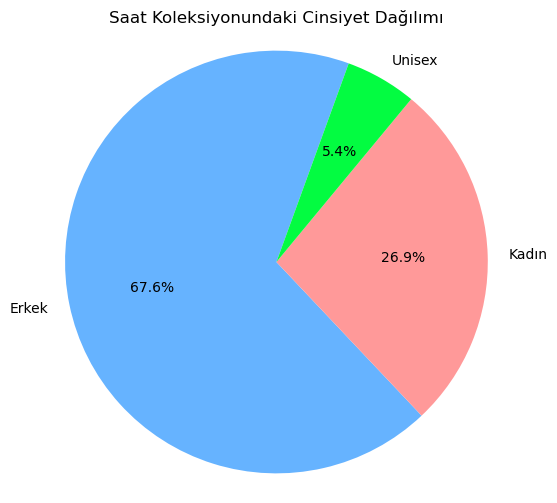

In [34]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize = (6,6))
labels = gender_counts.index
sizes = gender_counts.values
autopct = '%1.1f%%'
plt.pie(sizes, 
        labels=labels, 
        autopct=autopct, 
        startangle=70, 
        colors=['#66b3ff', '#ff9999','#03fc41'])  # Yeni bir renge ihtiyacımız var yeşil olarak ekledim 
plt.title('Saat Koleksiyonundaki Cinsiyet Dağılımı')
plt.axis('equal') 
plt.show()

In [36]:
df['Mechanism'].unique()

array(['Otomatik', 'Pilli', 'Elle Kurmalı'], dtype=object)

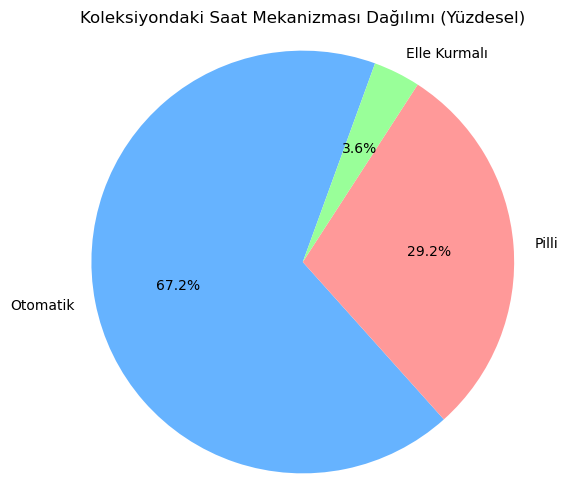

In [44]:
mechanism_counts = df['Mechanism'].value_counts()
plt.figure(figsize=(6, 6)) 

plt.pie(mechanism_counts.values, 
        labels=mechanism_counts.index, 
        autopct='%1.1f%%', 
        startangle=70, 
        colors=['#66b3ff', '#ff9999', '#99ff99'])

plt.title('Koleksiyondaki Saat Mekanizması Dağılımı (Yüzdesel)')
plt.axis('equal') 
plt.show()